# About dataset
Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition. By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.

# Bussines Question
Business Questions:
* What are the primary factors driving customer churn?

Why it matters: Identifying the key factors that lead to customer churn helps the business focus on those areas to implement effective retention strategies.
* How accurately can we predict customer churn?

Why it matters: Accurate predictions allow the business to proactively engage with at-risk customers and prevent churn, thereby saving costs and increasing customer lifetime value.
* Are there specific behavioral patterns that indicate a higher likelihood of churn?

Why it matters: Recognizing patterns in customer behavior that precede churn enables the business to intervene before a customer decides to leave, improving retention rates.
* What is the impact of payment delays on the likelihood of churn?

Why it matters: Understanding the correlation between payment delays and churn can lead to adjustments in payment policies or the introduction of reminders and incentives to encourage timely payments.
* Which customer segments are most vulnerable to churn?

Why it matters: Identifying the most at-risk segments allows the business to tailor retention strategies to these groups, potentially reducing overall churn rates.
* How does churn impact the company's revenue?

Why it matters: Quantifying the revenue lost due to churn helps in understanding the financial impact and justifying the investment in retention programs.
* Can we reduce churn by modifying product or service offerings?

Why it matters: If certain product or service changes can reduce churn, this insight can guide strategic decisions that improve customer satisfaction and retention.
* How effective are the current retention strategies implemented by the company?

Why it matters: Evaluating the effectiveness of existing retention strategies helps in optimizing them or in designing new, more effective approaches.

In [10]:
#Import library
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [11]:
#Import dataset
df_train = pd.read_csv('/content/customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

In [12]:
#combine dataset
df = pd.concat([df_train,df_test])
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [14]:
#Check missing value
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [15]:
#Drop missing value
df = df.dropna()

In [16]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [17]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# EDA

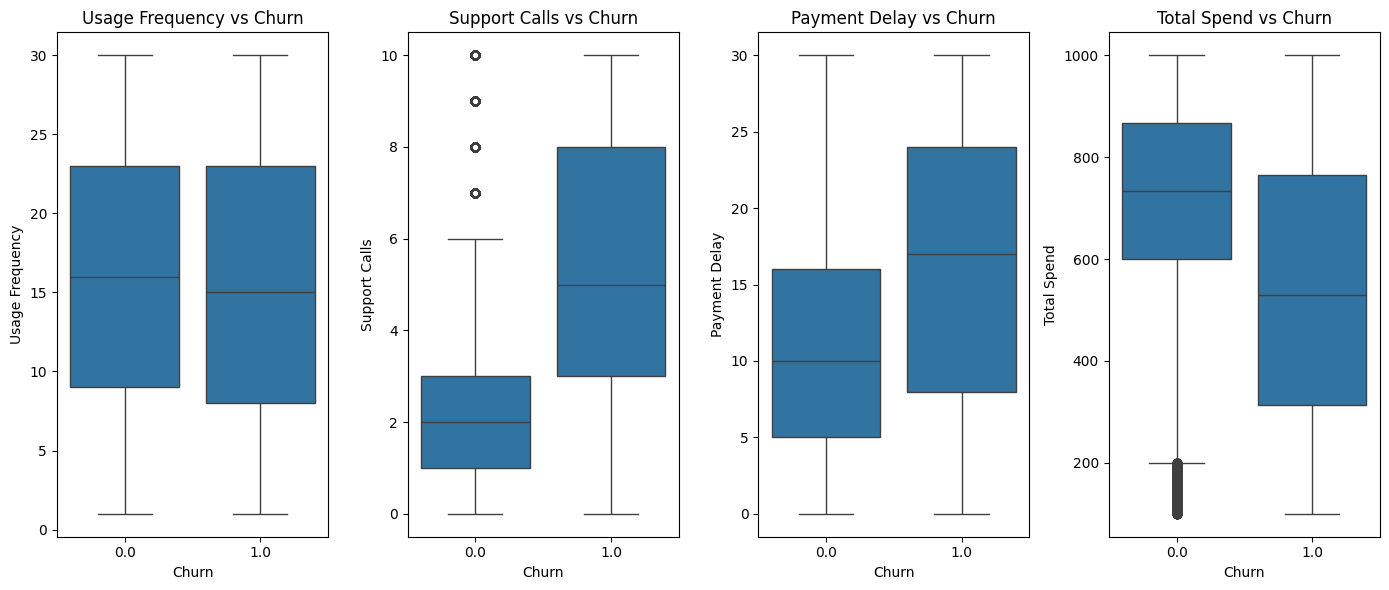

In [18]:
# Plot behavior patterns
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
sns.boxplot(x='Churn', y='Usage Frequency', data=df)
plt.title('Usage Frequency vs Churn')

plt.subplot(1, 4, 2)
sns.boxplot(x='Churn', y='Support Calls', data=df)
plt.title('Support Calls vs Churn')

plt.subplot(1, 4, 3)
sns.boxplot(x='Churn', y='Payment Delay', data=df)
plt.title('Payment Delay vs Churn')

plt.subplot(1, 4, 4)
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title('Total Spend vs Churn')


plt.tight_layout()
plt.show()

Payment Delay and Churn correlation : 0.33


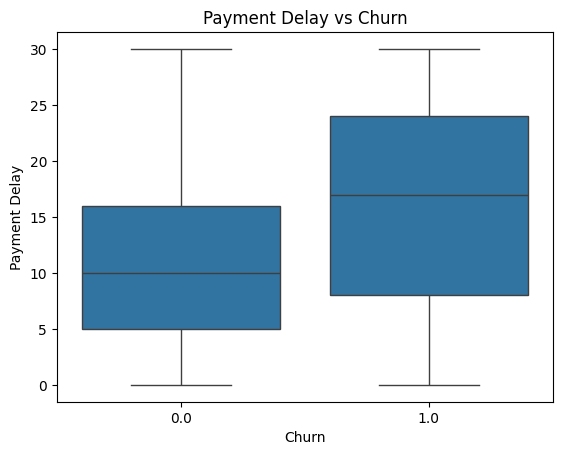

In [19]:
# Calculate the correlation between Payment Delay and Churn
correlation = df['Payment Delay'].corr(df['Churn'])
print(f"Payment Delay and Churn correlation : {correlation:.2f}")

# Visualize Payment Delay vs Churn
sns.boxplot(x='Churn', y='Payment Delay', data=df)
plt.title('Payment Delay vs Churn')
plt.show()


Customer Segments and Churn Rate:
    Subscription Type   Age  Churn Rate  Number of Customers
41              Basic  59.0    0.916007                 2274
33              Basic  51.0    0.911346                 2177
46              Basic  64.0    0.910831                 2299
140          Standard  62.0    0.910566                 2281
136          Standard  58.0    0.909492                 2265
89            Premium  59.0    0.908534                 2285
47              Basic  65.0    0.908011                 2272
39              Basic  57.0    0.906924                 2224
85            Premium  55.0    0.906731                 2273
86            Premium  56.0    0.906684                 2304


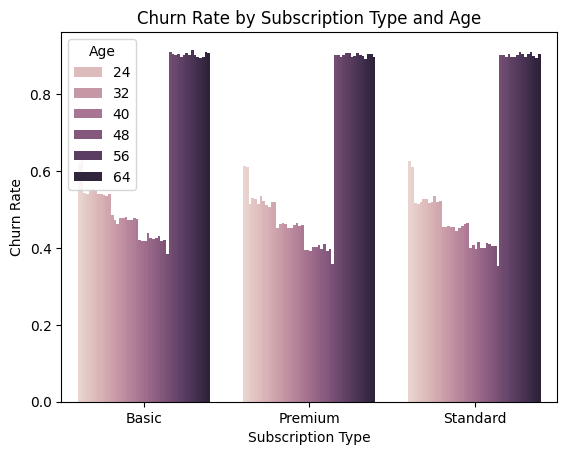

In [20]:
# Segment customers by Subscription Type and Age
segments = df.groupby(['Subscription Type', 'Age']).agg({
    'Churn': 'mean',
    'CustomerID': 'count'
}).reset_index()

segments.columns = ['Subscription Type', 'Age', 'Churn Rate', 'Number of Customers']

print("Customer Segments and Churn Rate:")
print(segments.sort_values(by='Churn Rate', ascending=False).head(10))

# Visualize the churn rate by segment
sns.barplot(x='Subscription Type', y='Churn Rate', hue='Age', data=segments)
plt.title('Churn Rate by Subscription Type and Age')
plt.show()


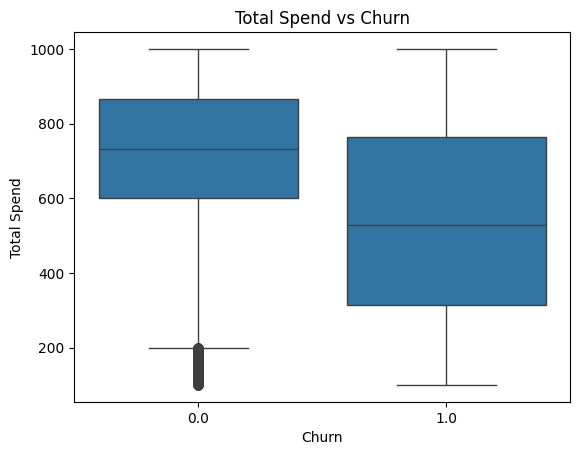

Average spending of churn customers: 538.90
Average customer spend does not churn: 721.39


In [21]:
# Compare total spend for churned vs non-churned customers
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title('Total Spend vs Churn')
plt.show()

# Calculate the average revenue lost due to churn
revenue_loss = df.groupby('Churn')['Total Spend'].mean()
print(f"Average spending of churn customers: {revenue_loss[1]:.2f}")
print(f"Average customer spend does not churn: {revenue_loss[0]:.2f}")


# Modelling

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [23]:
#Drop missing value
df_train = df_train.dropna()
df_test = df_test.dropna()

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [25]:
# Define features and target
X = df.drop(columns=['Churn', 'CustomerID'])  # Drop Churn target and CustomerID
y = df['Churn']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Gender', 'Subscription Type', 'Contract Length'])

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Key Factors Affecting Churn:")
print(feature_importances)

Key Factors Affecting Churn:
                       Feature  Importance
3                Support Calls    0.250246
5                  Total Spend    0.187302
4                Payment Delay    0.141135
0                          Age    0.131512
13     Contract Length_Monthly    0.077133
6             Last Interaction    0.068746
1                       Tenure    0.042409
2              Usage Frequency    0.032925
14   Contract Length_Quarterly    0.015780
7                Gender_Female    0.015203
12      Contract Length_Annual    0.014904
8                  Gender_Male    0.013193
9      Subscription Type_Basic    0.003589
11  Subscription Type_Standard    0.002990
10   Subscription Type_Premium    0.002931


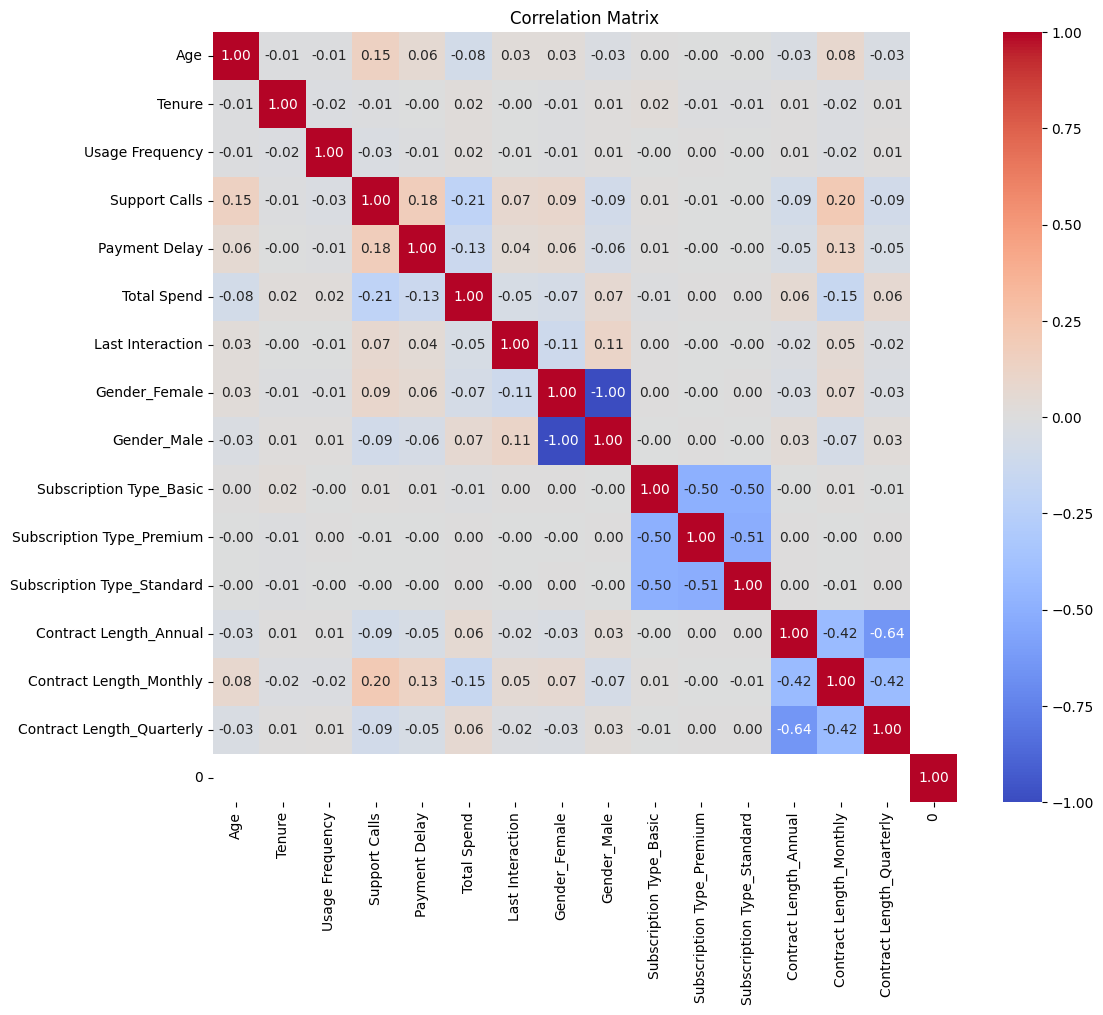

In [31]:
# Calculate the correlation matrix
df_corr = pd.concat([X,y])
corr_matrix = df_corr.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [26]:
# Evaluate the model
y_pred = model.predict(X_test)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     44981
         1.0       0.90      1.00      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



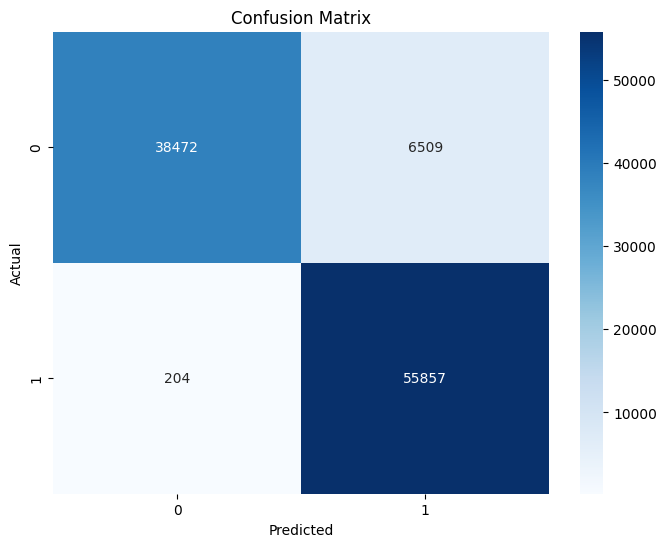

In [27]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# # Scale the features to help models converge and perform better
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define a dictionary with the models you want to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    # "Support Vector Machine": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Create a list to store the results
results = []

# Loop through each model, train it, and evaluate it
for name, model in models.items():
    # Train the model
    # model.fit(X_train_scaled, y_train)
    model.fit(X_train, y_train)

    # Make predictions
    # y_pred = model.predict(X_test_scaled)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append the results to the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Display the comparison results
print(results_df)

# Optionally, sort the results by the metric of your choice
results_df = results_df.sort_values(by='F1-Score', ascending=False)
print("Sorted by F1-Score:")
print(results_df)

KeyboardInterrupt: 

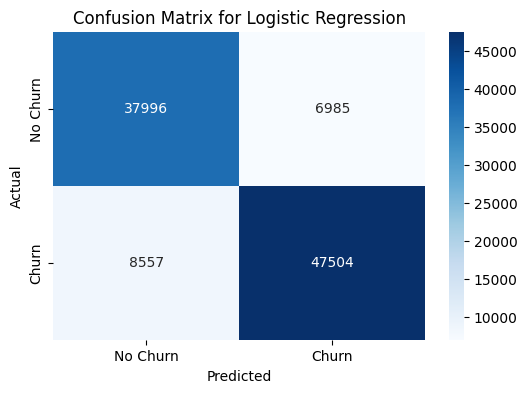

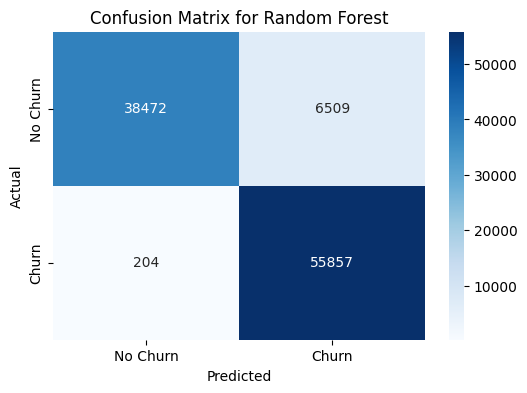

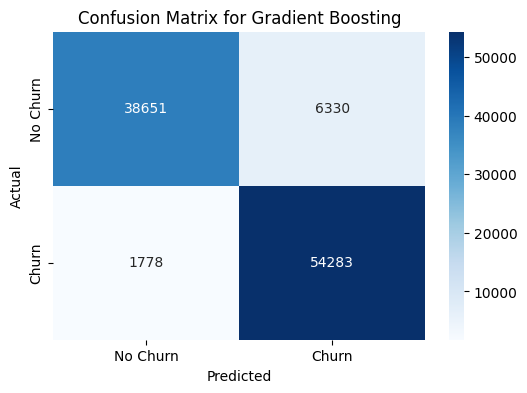

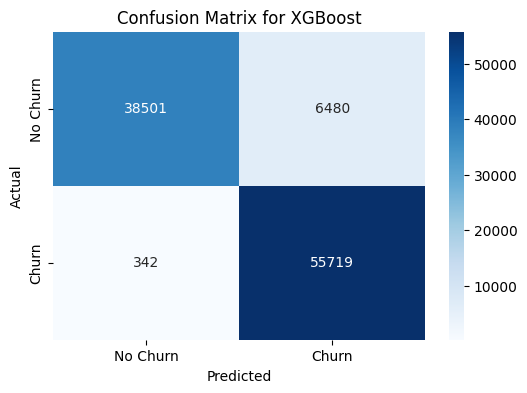

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.846183   0.871809  0.847363  0.859412
1        Random Forest  0.933562   0.895632  0.996361  0.943315
2    Gradient Boosting  0.919756   0.895567  0.968285  0.930507
3              XGBoost  0.932484   0.895818  0.993900  0.942314
Sorted by F1-Score:
                 Model  Accuracy  Precision    Recall  F1-Score
1        Random Forest  0.933562   0.895632  0.996361  0.943315
3              XGBoost  0.932484   0.895818  0.993900  0.942314
2    Gradient Boosting  0.919756   0.895567  0.968285  0.930507
0  Logistic Regression  0.846183   0.871809  0.847363  0.859412


In [21]:
# Define a dictionary with the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Create a list to store the results
results = []

# Loop through each model, train it, and evaluate it
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append the results to the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Display the comparison results
print(results_df)

# Optionally, sort the results by the metric of your choice
results_df = results_df.sort_values(by='F1-Score', ascending=False)
print("Sorted by F1-Score:")
print(results_df)